## Problem Sheet Question 2b

The general form of the population growth differential equation
$$ y^{'}=y-t, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=2$$
For N=4
with the analytic (exact) solution
$$ y= e^{t}+t+1$$

# Runge Kutta Solution

The Runge Kutta difference equation is
$$w_{i+1} = w_{i} + \frac{1}{6}(k_1+2k_2+2k_3+k_4) $$
where
$$k_1=h(w_i-t_i)$$
$$k_2=h((w_i+\frac{1}{2}k_1)-(t_i+\frac{h}{2}))$$
$$k_3=h((w_i+\frac{1}{2}k_2)-(t_i+\frac{h}{2}))$$
$$k_4=h((w_i+k_3)-(t_i+h))$$

In [4]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
#from ipywidgets import *
#import pandas as pd


  Using cached https://files.pythonhosted.org/packages/b7/e3/f52d484244105fa3d558ce8217a5190cd3d40536076bef66d92d01566325/pandas-0.23.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/40/c5/f1ed15dd931d6667b40f1ab1c2fe1f26805fc2b6c3e25e45664f838de9d0/numpy-1.15.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cf/f5/af2b09c957ace60dcfac112b669c45c8c97e32f94aa8b56da4c6d1682825/python_dateutil-2.7.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/30/4e/27c34b62430286c6d59177a0842ed90dc789ce5d1ed740887653b898779a/pytz-2018.5-py2.py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/usr/lib/python2.7/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/lib/python2.7/site-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/lib/python2.7/site-packages/pip/req/req_set.py", 

ImportError: No module named 'pandas'

In [5]:
def myfun_ty(t,y):
    return y-t#+3*y



#PLOTS
def RK4_Question2(N,IC):

    x_end=4
    x_start=0
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+2;
    k_list=np.zeros(N)
    t=np.zeros(N)
    w=np.zeros(N)
    k_mat=np.zeros((4,N))
    Analytic_Solution=np.zeros(N)
    k=0
    w[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    t[0]=x_start
    k_list[k]=k
    for k in range (0,N-1):
        k_mat[0,k]=myfun_ty(t[k],w[k])
        k_mat[1,k]=myfun_ty(t[k]+h/2.0,w[k]+h/2.0*k_mat[0,k])
        k_mat[2,k]=myfun_ty(t[k]+h/2.0,w[k]+h/2.0*k_mat[1,k])
        k_mat[3,k]=myfun_ty(t[k]+h,w[k]+h*k_mat[2,k])
        w[k+1]=w[k]+h/6.0*(k_mat[0,k]+2*k_mat[1,k]+2*k_mat[2,k]+k_mat[3,k])
        t[k+1]=t[k]+h
        k_list[k+1]=k+1
        Analytic_Solution[k+1]=math.exp(t[k+1])+t[k+1]+1

    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,3,1)
    plt.plot(t,w,color='red')
    #ax.legend(loc='best')
    plt.title('Numerical Solution h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,3,2)
    plt.plot(t,Analytic_Solution,color='blue')
    plt.title('Analytic Solution')

    #ax.legend(loc='best')
    ax = fig.add_subplot(1,3,3)
    plt.plot(t,Analytic_Solution-w,color='blue')
    plt.title('Error')

    # --- title, explanatory text and save



    # --- title, explanatory text and save
    fig.suptitle(r"$y'=y-t$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    
    print(t)
    print(Analytic_Solution)
    print(w)

[ 0.  1.  2.  3.  4.  5.]
[   2.            4.71828183   10.3890561    24.08553692   59.59815003
  154.4131591 ]
[   2.            4.70833333   10.33506944   23.86581308   58.80324375
  151.7171185 ]


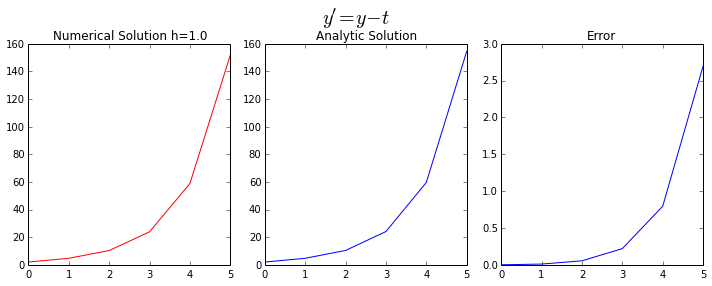

In [6]:
RK4_Question2(4,2)